In [242]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import scipy.stats as stats


In [196]:

# File to Load
# county_median = Path("../Desktop/median_county_income.csv")

county_median = Path("../Desktop/estimate_of_median.csv")

# Read Data File and store into Pandas DataFrames
income_by_county = pd.read_csv("estimate_of_median.csv", header=1)


income_by_county.head()

,Series ID,Region Name,Region Code,1989-01-01,1990-01-01,1991-01-01,1992-01-01,1993-01-01,1994-01-01,1995-01-01,...,2013-01-01,2014-01-01,2015-01-01,2016-01-01,2017-01-01,2018-01-01,2019-01-01,2020-01-01,2021-01-01,2022-01-01
0,MHIAL01001A052NCEN,"Autauga County, AL",1001,26898.0,NaN,NaN,NaN,30906.0,NaN,34842.0,...,51868.0,54366.0,56580.0,54487.0,58343.0,59338.0,58233.0,67565.0,66444.0,70148.0
1,MHIAL01003A052NCEN,"Baldwin County, AL",1003,24043.0,NaN,NaN,NaN,29040.0,NaN,35014.0,...,47539.0,49626.0,52387.0,56460.0,56607.0,57588.0,59871.0,71135.0,65658.0,71704.0
2,MHIAL01005A052NCEN,"Barbour County, AL",1005,18673.0,NaN,NaN,NaN,22446.0,NaN,24423.0,...,30981.0,34971.0,31433.0,32884.0,32490.0,34382.0,35972.0,38866.0,38649.0,41151.0
3,MHIAL01007A052NCEN,"Bibb County, AL",1007,19604.0,NaN,NaN,NaN,22789.0,NaN,26651.0,...,39781.0,39546.0,40767.0,43079.0,45795.0,46064.0,47918.0,50907.0,48454.0,54309.0
4,MHIAL01009A052NCEN,"Blount County, AL",1009,24035.0,NaN,NaN,NaN,27607.0,NaN,30584.0,...,44392.0,45567.0,50487.0,47213.0,48253.0,50412.0,52902.0,55203.0,56894.0,60553.0


In [197]:
# # Define a list of counties you want to pull
#counties_to_pull = ['Kings County, NY', 'Queens County, NY', 'Bronx County, NY', 'Richmond County, NY', 'New York County, NY']  

nyc_income = income_by_county[income_by_county['Region Name'].isin(['Kings County, NY', 'Queens County, NY', 'Bronx County, NY', 'Richmond County, NY', 'New York County, NY'])]

nyc_income

,Series ID,Region Name,Region Code,1989-01-01,1990-01-01,1991-01-01,1992-01-01,1993-01-01,1994-01-01,1995-01-01,...,2013-01-01,2014-01-01,2015-01-01,2016-01-01,2017-01-01,2018-01-01,2019-01-01,2020-01-01,2021-01-01,2022-01-01
1830,MHINY36005A052NCEN,"Bronx County, NY",36005,19881.0,NaN,NaN,NaN,21454.0,NaN,22225.0,...,33079.0,33687.0,35102.0,37355.0,37377.0,38566.0,41470.0,44906.0,43143.0,45864.0
1851,MHINY36047A052NCEN,"Kings County, NY",36047,21968.0,NaN,NaN,NaN,24122.0,NaN,24034.0,...,47067.0,47547.0,51026.0,54793.0,56548.0,60862.0,66501.0,70390.0,66943.0,73244.0
1858,MHINY36061A052NCEN,"New York County, NY",36061,27667.0,NaN,NaN,NaN,31962.0,NaN,34405.0,...,71443.0,75459.0,75136.0,77214.0,84133.0,84610.0,93007.0,87745.0,84371.0,95514.0
1868,MHINY36081A052NCEN,"Queens County, NY",36081,30900.0,NaN,NaN,NaN,31970.0,NaN,34115.0,...,56307.0,56866.0,60241.0,61844.0,64046.0,68432.0,72975.0,78847.0,72807.0,80180.0
1870,MHINY36085A052NCEN,"Richmond County, NY",36085,41331.0,NaN,NaN,NaN,44175.0,NaN,48489.0,...,68621.0,70299.0,71058.0,75524.0,78466.0,79719.0,86624.0,81003.0,84744.0,91582.0


# Cleaned Data

In [198]:
# columns_to_drop = ['Column1', 'Column2']  # Add the names of columns you want to drop
# df = df.drop(columns=columns_to_drop)

nyc_income_years = ['Region Name', '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01', '2020-01-01'] 
nyc_income = nyc_income[nyc_income_years]

nyc_income

,Region Name,2010-01-01,2011-01-01,2012-01-01,2013-01-01,2014-01-01,2015-01-01,2016-01-01,2017-01-01,2018-01-01,2019-01-01,2020-01-01
1830,"Bronx County, NY",32674.0,32137.0,32510.0,33079.0,33687.0,35102.0,37355.0,37377.0,38566.0,41470.0,44906.0
1851,"Kings County, NY",42047.0,42437.0,44850.0,47067.0,47547.0,51026.0,54793.0,56548.0,60862.0,66501.0,70390.0
1858,"New York County, NY",63188.0,65833.0,66739.0,71443.0,75459.0,75136.0,77214.0,84133.0,84610.0,93007.0,87745.0
1868,"Queens County, NY",52486.0,53124.0,54373.0,56307.0,56866.0,60241.0,61844.0,64046.0,68432.0,72975.0,78847.0
1870,"Richmond County, NY",69163.0,69436.0,70295.0,68621.0,70299.0,71058.0,75524.0,78466.0,79719.0,86624.0,81003.0


# NYC Boroughs & National: Line and Box & Whisker Graphs

In [220]:
#create new csv

nyc_median_yearly_income = pd.DataFrame(nyc_income)

# Write DataFrame to CSV file
nyc_median_yearly_income.to_csv('nyc_median_yearly_income.csv', index=False)

In [225]:
counties = ['Kings County, NY', 'Queens County, NY', 'Bronx County, NY', 'Richmond County, NY', 'New York County, NY', 'National']
years = list(range(2010, 2021))

# Sample median income data for each county over 10 years
median_incomes = {
    'Kings County, NY': [42047, 42437,	44850,	47067,	47547,	51026,	54793,	56548,	60862,	66501,	70390],
    'Queens County, NY': [52486, 53124,	54373,	56307,	56866,	60241,	61844,	64046,	68432,	72975,	78847],
    'Bronx County, NY': [32674,	32137,	32510,	33079,	33687,	35102,	37355,	37377,	38566,	41470,	44906],
    'Richmond County, NY': [69163,	69436,	70295,	68621,	70299,	71058,	75524,	78466,	79719,	86624,	81003],
    'New York County, NY': [63188,	65833,	66739,	71443,	75459,	75136,	77214,	84133,	84610,	93007,	87745],
    'National': [41255.5, 41974.5, 43018.5, 43990.5, 45229.0, 46807.0, 47592.0, 48893.0, 50576.0, 53344.0, 55150.0]
}

plt.show()

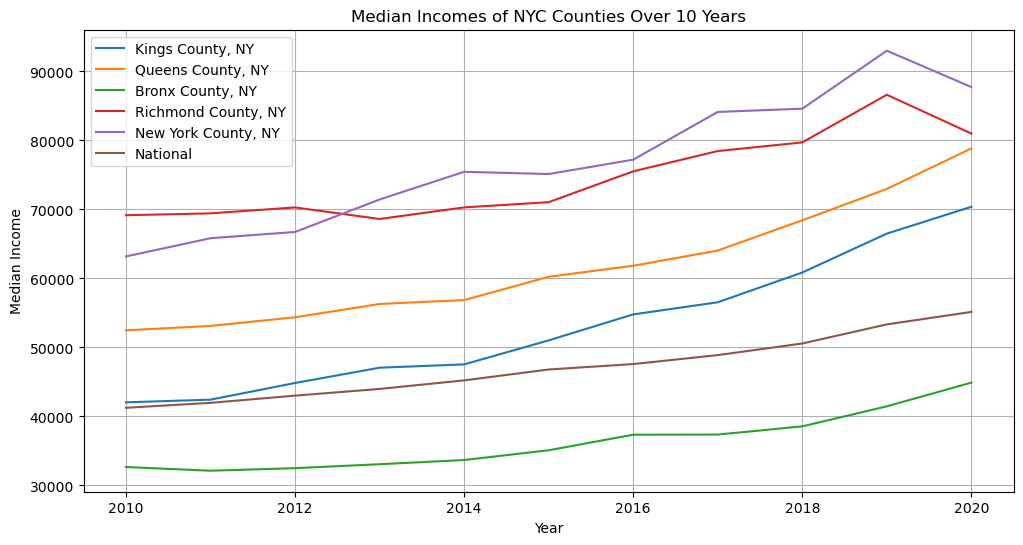

In [226]:
plt.figure(figsize=(12, 6))

for county in counties:
    plt.plot(years, median_incomes[county], label=county)

plt.xlabel('Year')
plt.ylabel('Median Income')
plt.title('Median Incomes of NYC Counties Over 10 Years with National for Comparison')
plt.legend()
plt.grid(True)
plt.show()

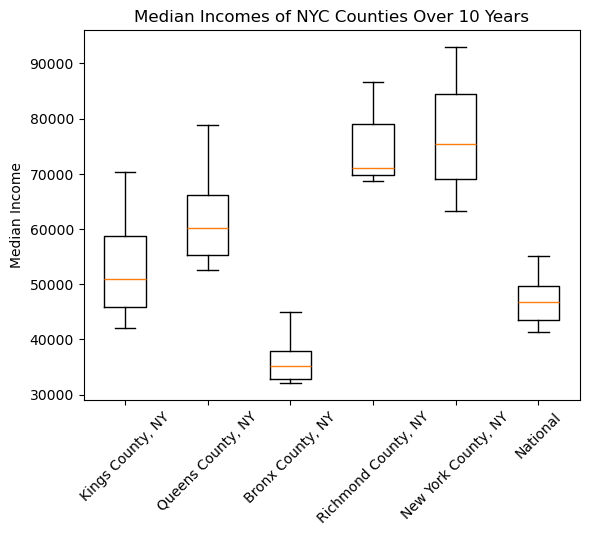

In [227]:
plt.boxplot(median_incomes.values())

plt.title('Median Incomes of NYC Counties Over 10 Years Compared with National')
plt.ylabel('Median Income')
plt.xticks(range(1, len(median_incomes) + 1), median_incomes.keys(), rotation = 45)

plt.show()

# Summary Stats

In [202]:
# Transpose rows and columns
transposed_income = nyc_income.T

# Set the new header
transposed_income.columns = transposed_income.iloc[0]

# Drop the original header row and reset the index
transposed_income = transposed_income.drop(transposed_income.index[0])
transposed_income.reset_index(drop=True, inplace=True)

transposed_income

Region Name,"Bronx County, NY","Kings County, NY","New York County, NY","Queens County, NY","Richmond County, NY"
0,32674.0,42047.0,63188.0,52486.0,69163.0
1,32137.0,42437.0,65833.0,53124.0,69436.0
2,32510.0,44850.0,66739.0,54373.0,70295.0
3,33079.0,47067.0,71443.0,56307.0,68621.0
4,33687.0,47547.0,75459.0,56866.0,70299.0
5,35102.0,51026.0,75136.0,60241.0,71058.0
6,37355.0,54793.0,77214.0,61844.0,75524.0
7,37377.0,56548.0,84133.0,64046.0,78466.0
8,38566.0,60862.0,84610.0,68432.0,79719.0
9,41470.0,66501.0,93007.0,72975.0,86624.0


In [230]:
#Summary Stats

county_stats = pd.DataFrame(median_incomes)

# Mean
means = county_stats.mean()
print("Means:")
print(means)

# Median
medians = county_stats.median()
print("\nMedians:")
print(medians)

# Variance
variances = county_stats.var()
print("\nVariances:")
print(variances)

# Standard Deviation
std_devs = county_stats.std()
print("\nStandard Deviations:")
print(std_devs)

# Standard Error of the Mean (SEM)
sems = county_stats.sem()
print("\nSEMs:")
print(sems)

Means:
Kings County, NY       53097.090909
Queens County, NY      61776.454545
Bronx County, NY       36260.272727
Richmond County, NY    74564.363636
New York County, NY    76773.363636
National               47075.454545
dtype: float64

Medians:
Kings County, NY       51026.0
Queens County, NY      60241.0
Bronx County, NY       35102.0
Richmond County, NY    71058.0
New York County, NY    75459.0
National               46807.0
dtype: float64

Variances:
Kings County, NY       9.289997e+07
Queens County, NY      7.386364e+07
Bronx County, NY       1.716628e+07
Richmond County, NY    3.691186e+07
New York County, NY    9.374424e+07
National               2.096660e+07
dtype: float64

Standard Deviations:
Kings County, NY       9638.462828
Queens County, NY      8594.395841
Bronx County, NY       4143.221502
Richmond County, NY    6075.513184
New York County, NY    9682.161094
National               4578.929468
dtype: float64

SEMs:
Kings County, NY       2906.105887
Queens County, NY  

In [231]:
#Summary stats dataframe

county_stats = pd.DataFrame({
                    'Means': means,
                    'Medians': medians,
                    'Variances': variances,
                    'Standard Deviations': std_devs,
                    'SEMS': sems})

df = pd.DataFrame(county_stats)

# Using the aggregation method, produce the same summary statistics in a single line

county_stats["Means"] = county_stats["Means"].map("${:,.2f}".format)

county_stats["Medians"] = county_stats["Medians"].map("${:,.2f}".format)

county_stats["Variances"] = county_stats["Variances"].map("{:,.2f}".format)

county_stats["Standard Deviations"] = county_stats["Standard Deviations"].map("{:,.2f}".format)

county_stats["SEMS"] = county_stats["SEMS"].map("{:,.2f}".format)


# Display the DataFrame

county_stats

,Means,Medians,Variances,Standard Deviations,SEMS
"Kings County, NY","$53,097.09","$51,026.00","92,899,965.69","9,638.46","2,906.11"
"Queens County, NY","$61,776.45","$60,241.00","73,863,639.87","8,594.40","2,591.31"
"Bronx County, NY","$36,260.27","$35,102.00","17,166,284.42","4,143.22","1,249.23"
"Richmond County, NY","$74,564.36","$71,058.00","36,911,860.45","6,075.51","1,831.84"
"New York County, NY","$76,773.36","$75,459.00","93,744,243.45","9,682.16","2,919.28"
National,"$47,075.45","$46,807.00","20,966,595.07","4,578.93","1,380.60"


# Change Year to Year

In [235]:
# Compute year-to-year changes for each county
yearly_changes = nyc_income.set_index('Region Name').diff(axis=1)

# Display the DataFrame containing year-to-year changes
yearly_changes

,2010-01-01,2011-01-01,2012-01-01,2013-01-01,2014-01-01,2015-01-01,2016-01-01,2017-01-01,2018-01-01,2019-01-01,2020-01-01
Region Name,,,,,,,,,,,
"Bronx County, NY",NaN,-537.0,373.0,569.0,608.0,1415.0,2253.0,22.0,1189.0,2904.0,3436.0
"Kings County, NY",NaN,390.0,2413.0,2217.0,480.0,3479.0,3767.0,1755.0,4314.0,5639.0,3889.0
"New York County, NY",NaN,2645.0,906.0,4704.0,4016.0,-323.0,2078.0,6919.0,477.0,8397.0,-5262.0
"Queens County, NY",NaN,638.0,1249.0,1934.0,559.0,3375.0,1603.0,2202.0,4386.0,4543.0,5872.0
"Richmond County, NY",NaN,273.0,859.0,-1674.0,1678.0,759.0,4466.0,2942.0,1253.0,6905.0,-5621.0


In [237]:
# Sample median income data for each county over 10 years
median_incomes_nyc = {
    'Kings County, NY': [42047, 42437,	44850,	47067,	47547,	51026,	54793,	56548,	60862,	66501,	70390],
    'Queens County, NY': [52486, 53124,	54373,	56307,	56866,	60241,	61844,	64046,	68432,	72975,	78847],
    'Bronx County, NY': [32674,	32137,	32510,	33079,	33687,	35102,	37355,	37377,	38566,	41470,	44906],
    'Richmond County, NY': [69163,	69436,	70295,	68621,	70299,	71058,	75524,	78466,	79719,	86624,	81003],
    'New York County, NY': [63188,	65833,	66739,	71443,	75459,	75136,	77214,	84133,	84610,	93007,	87745]
}

plt.show()

In [238]:
counties = ['Kings County, NY', 'Queens County, NY', 'Bronx County, NY', 'Richmond County, NY', 'New York County, NY']
years = list(range(2011, 2021))

# Sample median income data for each county over 10 years
median_income_change = {
    'Bronx County, NY': [-537,	373, 569, 608, 1415, 2253, 22,	1189, 2904, 3436],
    'Kings County, NY': [390, 2413,	2217,	480,	3479,	3767,	1755,	4314,	5639,	3889],
    'New York County, NY': [2645,	906,	4704,	4016,	-323,	2078,	6919,	477,	8397,	-5262],
    'Queens County, NY': [638,	1249,	1934,	559,	3375,	1603,	2202,	4386,	4543,	5872],
    'Richmond County, NY': [273,	859,	-1674,	1678,	759,	4466,	2942,	1253,	6905,	-5621]
}

plt.show()

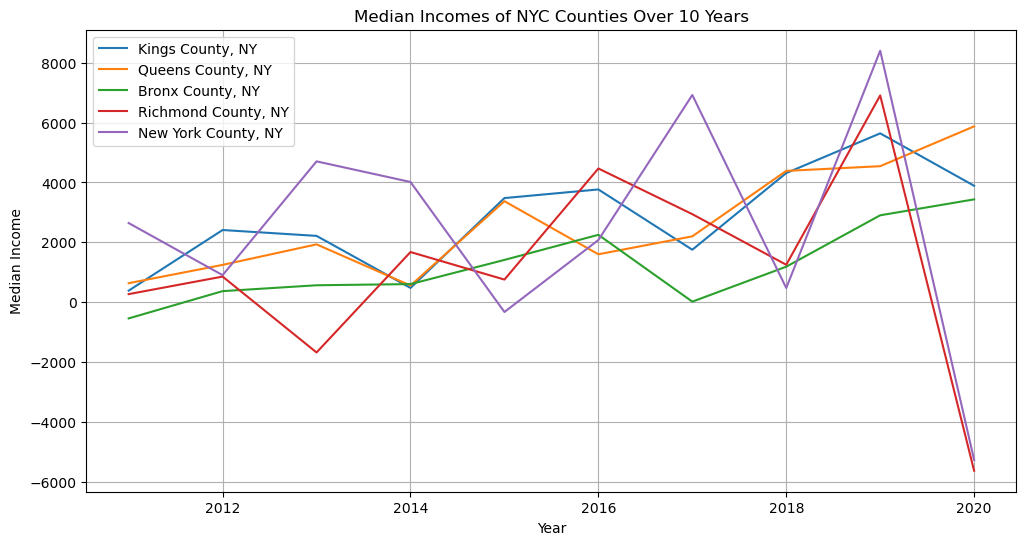

In [239]:
plt.figure(figsize=(12, 6))

for county in counties:
    plt.plot(years, median_income_change[county], label=county)

plt.xlabel('Year')
plt.ylabel('Median Income')
plt.title('Median Incomes of NYC Counties Over 10 Years')
plt.legend()
plt.grid(True)
plt.show()

# Regression Lines

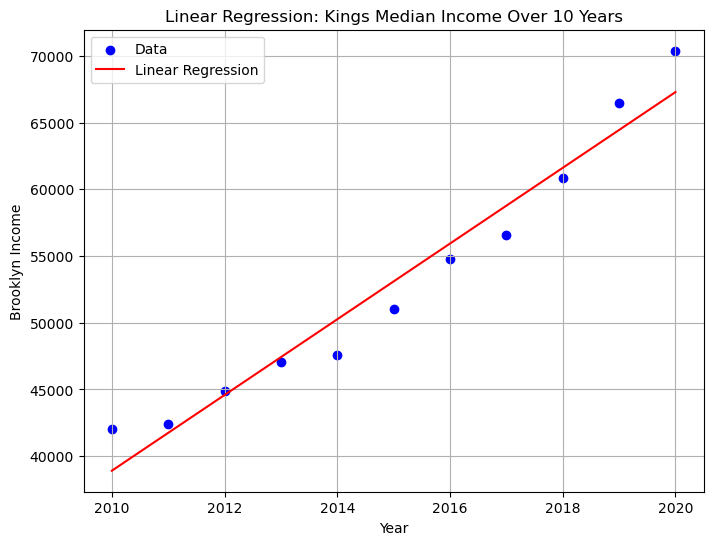

Slope: 2838.31818181809, Intercept: -5666114.045454361


In [266]:
# Sample data (replace with your actual data)
years = np.arange(2010, 2021)
brooklyn_income = np.array([42047, 42437,	44850,	47067,	47547,	51026,	54793,	56548,	60862,	66501,	70390])

# Perform linear regression
slope, intercept = np.polyfit(years, brooklyn_income, 1)

# Create the regression line
regression_line = slope * years + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data and regression line
plt.figure(figsize=(8, 6))
plt.scatter(years, brooklyn_income, color='blue', label='Data')
plt.plot(years, regression_line, color='red', label='Linear Regression')
plt.xlabel('Year')
plt.ylabel('Brooklyn Income')
plt.title('Linear Regression: Kings Median Income Over 10 Years')
plt.legend()
plt.grid(True)
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.show()


# Print the slope and intercept
print(f'Slope: {slope}, Intercept: {intercept}')

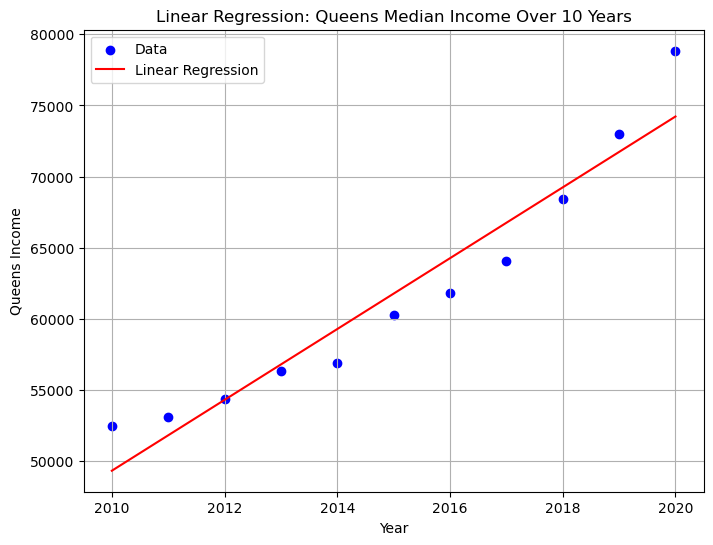

Slope: 2489.4727272726514, Intercept: -4954511.090908938


In [270]:
# Sample data (replace with your actual data)
years = np.arange(2010, 2021)
queens_income = np.array([52486, 53124,	54373,	56307,	56866,	60241,	61844,	64046,	68432,	72975,	78847])

# Perform linear regression
slope, intercept = np.polyfit(years, queens_income, 1)

# Create the regression line
regression_line = slope * years + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data and regression line
plt.figure(figsize=(8, 6))
plt.scatter(years, queens_income, color='blue', label='Data')
plt.plot(years, regression_line, color='red', label='Linear Regression')
plt.xlabel('Year')
plt.ylabel('Queens Income')
plt.title('Linear Regression: Queens Median Income Over 10 Years')
plt.legend()
plt.grid(True)
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.show()


# Print the slope and intercept
print(f'Slope: {slope}, Intercept: {intercept}')

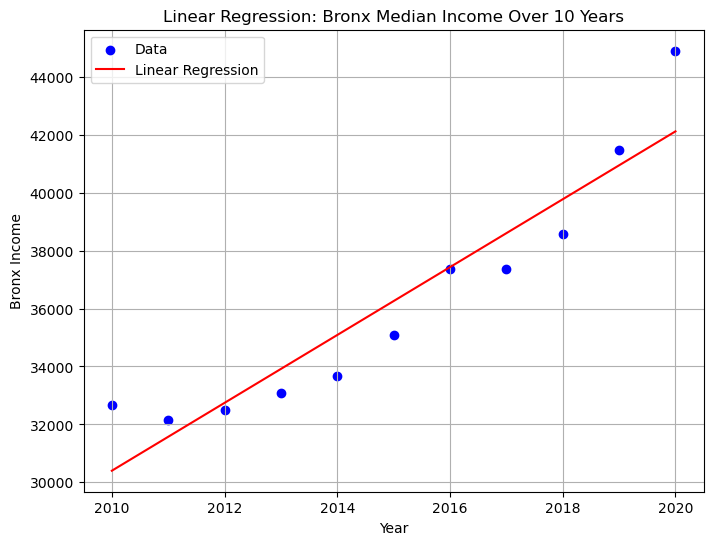

Slope: 1172.0363636363213, Intercept: -2325392.999999915


In [274]:
# Sample data (replace with your actual data)
years = np.arange(2010, 2021)
bronx_income = np.array([32674,	32137,	32510,	33079,	33687,	35102,	37355,	37377,	38566,	41470,	44906])

# Perform linear regression
slope, intercept = np.polyfit(years, bronx_income, 1)

# Create the regression line
regression_line = slope * years + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data and regression line
plt.figure(figsize=(8, 6))
plt.scatter(years, bronx_income, color='blue', label='Data')
plt.plot(years, regression_line, color='red', label='Linear Regression')
plt.xlabel('Year')
plt.ylabel('Bronx Income')
plt.title('Linear Regression: Bronx Median Income Over 10 Years')
plt.legend()
plt.grid(True)
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.show()


# Print the slope and intercept
print(f'Slope: {slope}, Intercept: {intercept}')

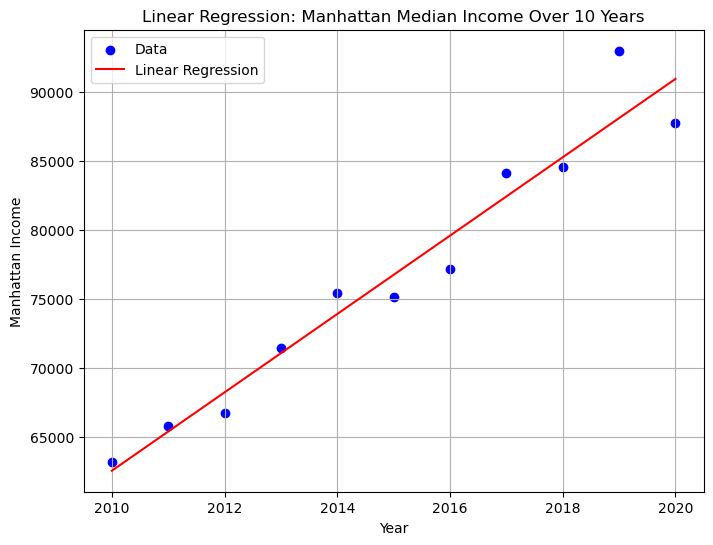

Slope: 2838.4454545453714, Intercept: -5642694.227272561


In [273]:
# Sample data (replace with your actual data)
years = np.arange(2010, 2021)
manhattan_income = np.array([63188,	65833,	66739,	71443,	75459,	75136,	77214,	84133,	84610,	93007,	87745])

# Perform linear regression
slope, intercept = np.polyfit(years, manhattan_income, 1)

# Create the regression line
regression_line = slope * years + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data and regression line
plt.figure(figsize=(8, 6))
plt.scatter(years, manhattan_income, color='blue', label='Data')
plt.plot(years, regression_line, color='red', label='Linear Regression')
plt.xlabel('Year')
plt.ylabel('Manhattan Income')
plt.title('Linear Regression: Manhattan Median Income Over 10 Years')
plt.legend()
plt.grid(True)
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.show()


# Print the slope and intercept
print(f'Slope: {slope}, Intercept: {intercept}')

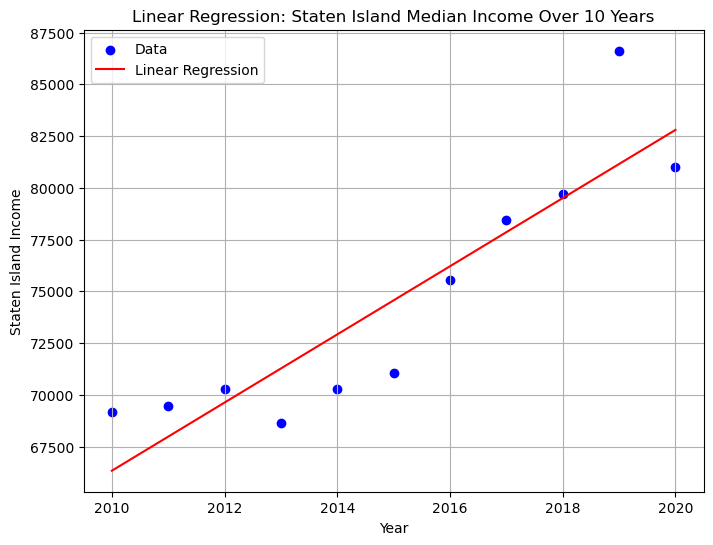

Slope: 1646.718181818118, Intercept: -3243572.7727271444


In [272]:
# Sample data (replace with your actual data)
years = np.arange(2010, 2021)
staten_island_income = np.array([69163,	69436,	70295,	68621,	70299,	71058,	75524,	78466,	79719,	86624,	81003])

# Perform linear regression
slope, intercept = np.polyfit(years, staten_island_income, 1)

# Create the regression line
regression_line = slope * years + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data and regression line
plt.figure(figsize=(8, 6))
plt.scatter(years, staten_island_income, color='blue', label='Data')
plt.plot(years, regression_line, color='red', label='Linear Regression')
plt.xlabel('Year')
plt.ylabel('Staten Island Income')
plt.title('Linear Regression: Staten Island Median Income Over 10 Years')
plt.legend()
plt.grid(True)
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.show()


# Print the slope and intercept
print(f'Slope: {slope}, Intercept: {intercept}')

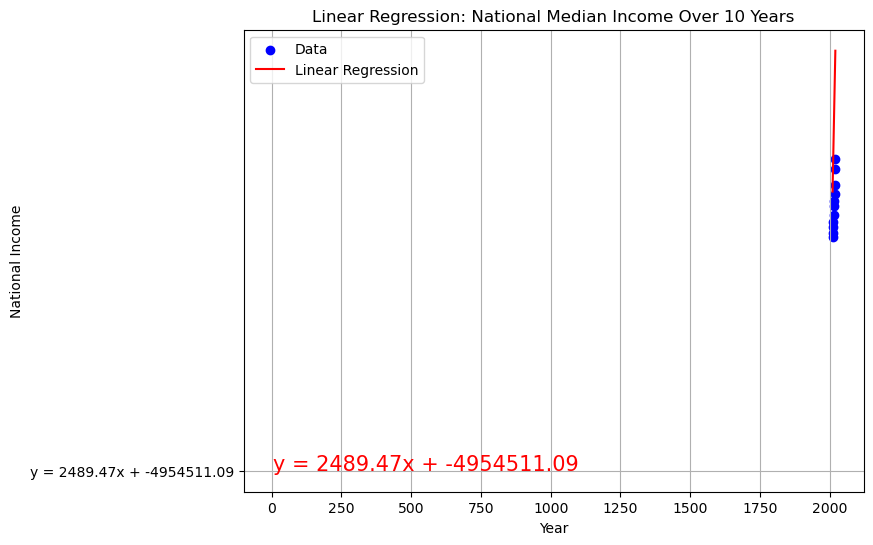

Slope: 2489.4727272726514, Intercept: -4954511.090908938


In [280]:
# Sample data (replace with your actual data)
years = np.arange(2010, 2021)
national_income = np.array([41255.5, 41974.5, 43018.5, 43990.5, 45229.0, 46807.0, 47592.0, 48893.0, 50576.0, 53344.0, 55150.0])

# Perform linear regression
slope, intercept = np.polyfit(years, queens_income, 1)

# Create the regression line
regression_line = slope * years + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data and regression line
plt.figure(figsize=(8, 6))
plt.scatter(years, national_income, color='blue', label='Data')
plt.plot(years, regression_line, color='red', label='Linear Regression')
plt.xlabel('Year')
plt.ylabel('National Income')
plt.title('Linear Regression: National Median Income Over 10 Years')
plt.legend()
plt.grid(True)
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
# plt.plot (f'Regression Line: y = {slope:.2f}x + {intercept:.2f}')
plt.plot(f'y = {slope:.2f}x + {intercept:.2f}')

plt.show()


# Print the slope and intercept
print(f'Slope: {slope}, Intercept: {intercept}')